## Importações de Bibliotecas e Carregamento de Dados

In [80]:
# Importações necessárias
import pandas as pd  # Manipulação e análise de dados
import seaborn as sns  # Visualizações estatísticas avançadas
import plotly.express as px  # Para gráficos interativos
import matplotlib.pyplot as plt  # Criação de gráficos estáticos
from matplotlib.ticker import MultipleLocator  # Configura espaçamentos nos eixos do Matplotlib

# Leitura do arquivo CSV contendo os dados de imigração para o Canadá
df = pd.read_csv('/content/imigrantes_canada.csv')

## Visualização Inicial e Preparação dos Dados

In [81]:
# Visualização inicial do DataFrame
df.head() # Exibe as primeiras 5 linhas do DataFrame

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [82]:
# Resumo do DataFrame tipos de dados e uso de memória.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [83]:
# Define a coluna 'País' como índice do DataFrame
df.set_index('País', inplace=True)

In [84]:
# Cria uma lista com os anos de 1980 a 2013 convertidos para string (nomes das colunas no arquivo)
anos = list(map(str, range(1980, 2014))) # Gera uma lista de strings contendo os anos de 1980 a 2013.
anos # Exibe a lista criada.

# Seleciona a linha correspondente ao 'Brasil' (agora o índice) e as colunas de anos definidas na lista 'anos'.
brasil = df.loc['Brasil', anos]
brasil # Exibe a série de dados.

# Cria um dicionário onde as chaves são 'ano' e 'imigrantes', e os valores são listas extraídas do índice (anos) e dos valores de imigrantes da série 'brasil'.
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict) # Converte o dicionário 'brasil_dict' em um novo DataFrame.
dados_brasil # Exibe o novo DataFrame 'dados_brasil'.

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


## Gráficos de Linha com Matplotlib

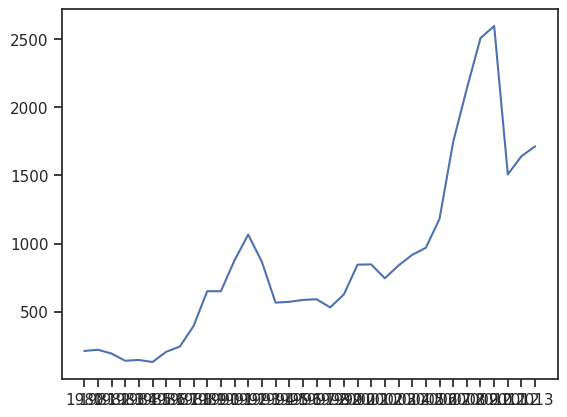

In [85]:
# Gráfico de linha simples
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])

([<matplotlib.axis.XTick at 0x7be03a5f9cd0>,
 [Text(0.0, 0, '1980'),
  Text(5.0, 0, '1985'),
  Text(10.0, 0, '1990'),
  Text(15.0, 0, '1995'),
  Text(20.0, 0, '2000'),
  Text(25.0, 0, '2005'),
  Text(30.0, 0, '2010')])

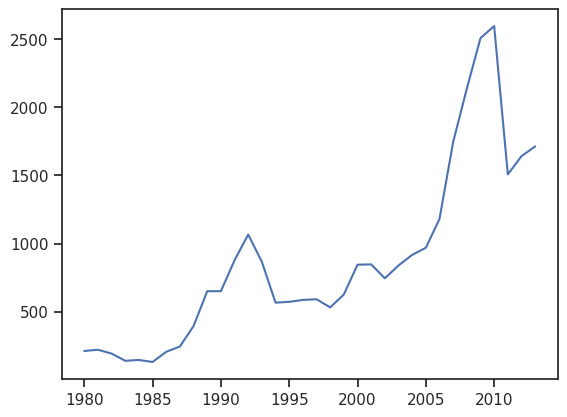

In [86]:
# Gráfico com anos específicos no eixo X
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes']) # Plota o gráfico de linha.
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010']) # Define explicitamente os rótulos ('ticks') no eixo X.

([<matplotlib.axis.YTick at 0x7be03840a510>,
 [Text(0, 500, '500'),
  Text(0, 1000, '1000'),
  Text(0, 1500, '1500'),
  Text(0, 2000, '2000'),
  Text(0, 2500, '2500'),
  Text(0, 3000, '3000')])

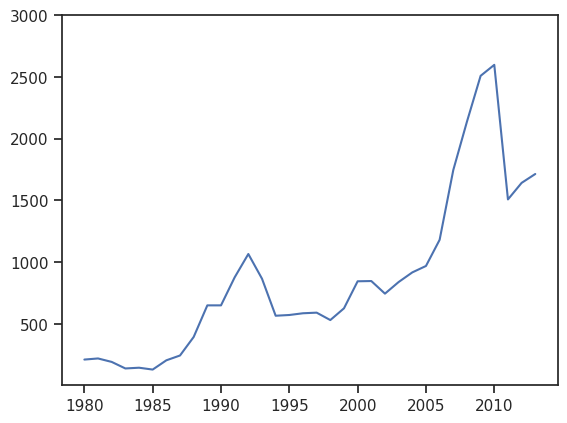

In [87]:
# Gráfico com ticks personalizados no eixo Y
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes']) # Plota o gráfico de linha.
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010']) # Mantém os rótulos personalizados do eixo X.
plt.yticks([500, 1000, 1500, 2000, 2500, 3000]) # Define os rótulos ('ticks') que aparecerão no eixo Y.

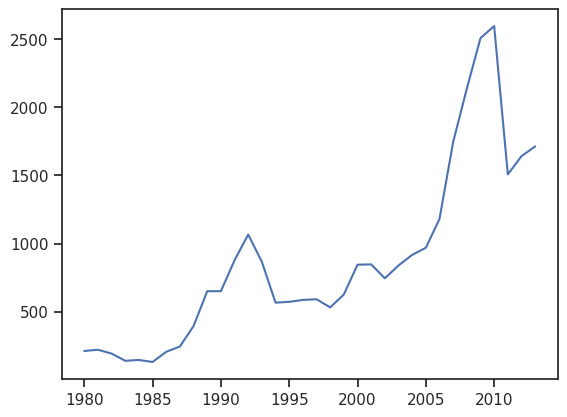

In [88]:
# Exibindo gráfico com plt.show()
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

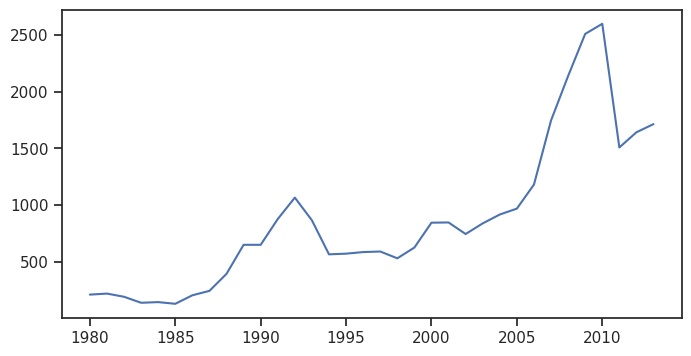

In [89]:
# Cria uma nova figura com dimensões de 8 polegadas de largura por 4 polegadas de altura.
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes']) # Plota o gráfico dentro da nova figura.
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010']) # Define os rótulos do eixo X.
plt.show() # Exibe o gráfico

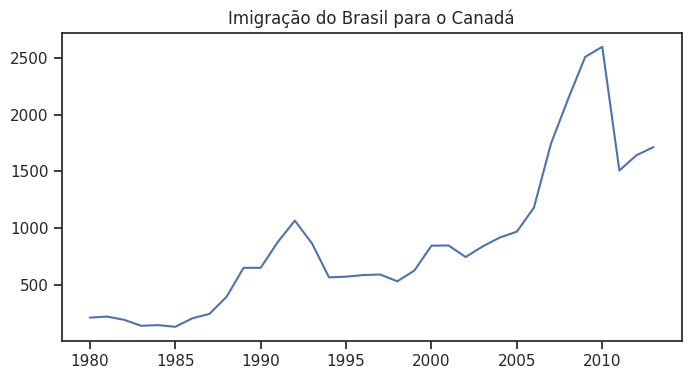

In [90]:
# Gráfico com título
plt.figure(figsize=(8,4)) # Cria uma nova figura.
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes']) # Plota o gráfico de linha.
plt.title('Imigração do Brasil para o Canadá') # Adiciona título.
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010']) # Rótulos do eixo X.
plt.show() # Exibe o gráfico.

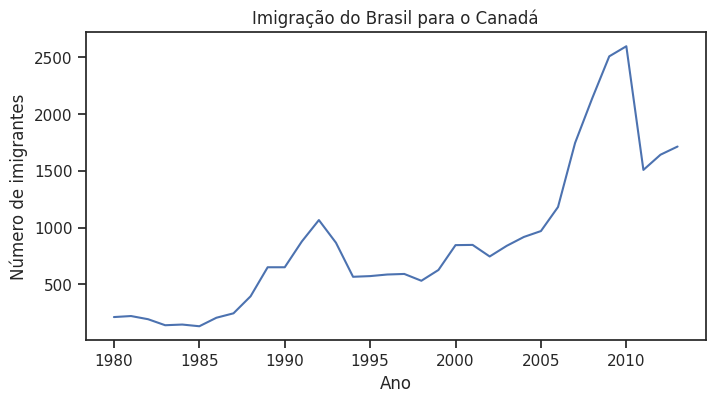

In [91]:
# Gráfico com rótulos nos eixos X e Y
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá') # Adiciona o título.
plt.xlabel('Ano') # Define o rótulo para o eixo (X).
plt.ylabel('Número de imigrantes') # Define o rótulo para o eixo (Y).
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010']) # Rótulos do eixo X.
plt.show()

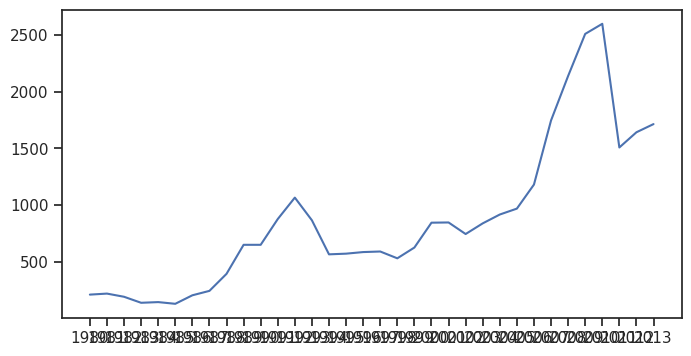

In [92]:
# Gráfico com objeto Figure e Axes
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes']) # Plota o gráfico de linha nos eixos 'ax'.
plt.show()

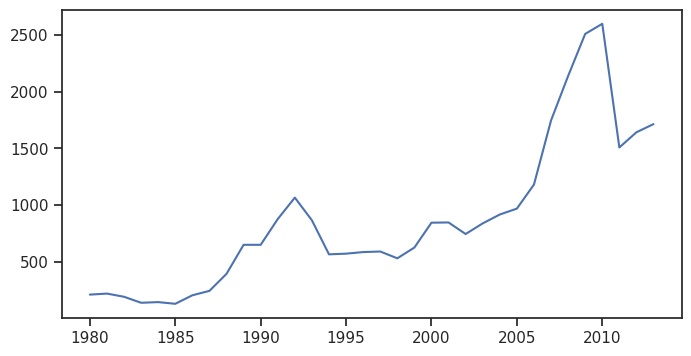

In [93]:
# Frequência dos rótulos no eixo X a cada 5 anos
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
# Configura o eixo X para que os rótulos apareçam a cada 5 anos
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

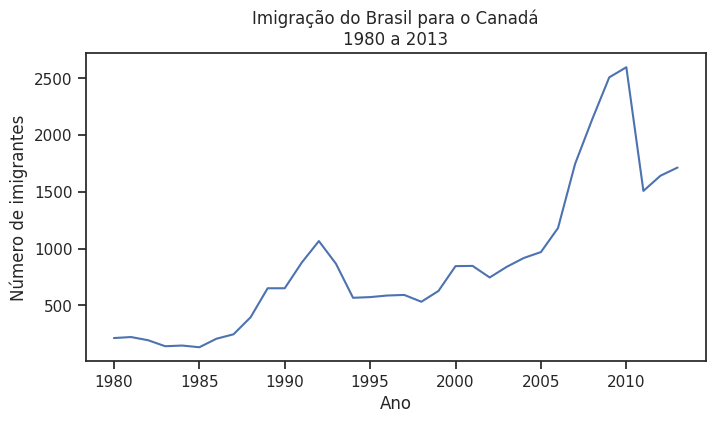

In [94]:
# Gráfico com título e labels via objeto Axes
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013') # Define o título usando 'ax'.
ax.set_xlabel('Ano') # Define o rótulo do eixo X usando 'ax'.
ax.set_ylabel('Número de imigrantes') # Define o rótulo do eixo Y usando 'ax'.
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Mantém a frequência do eixo X a cada 5 anos.
plt.show()

## Gráficos Comparativos e Subplots com Matplotlib

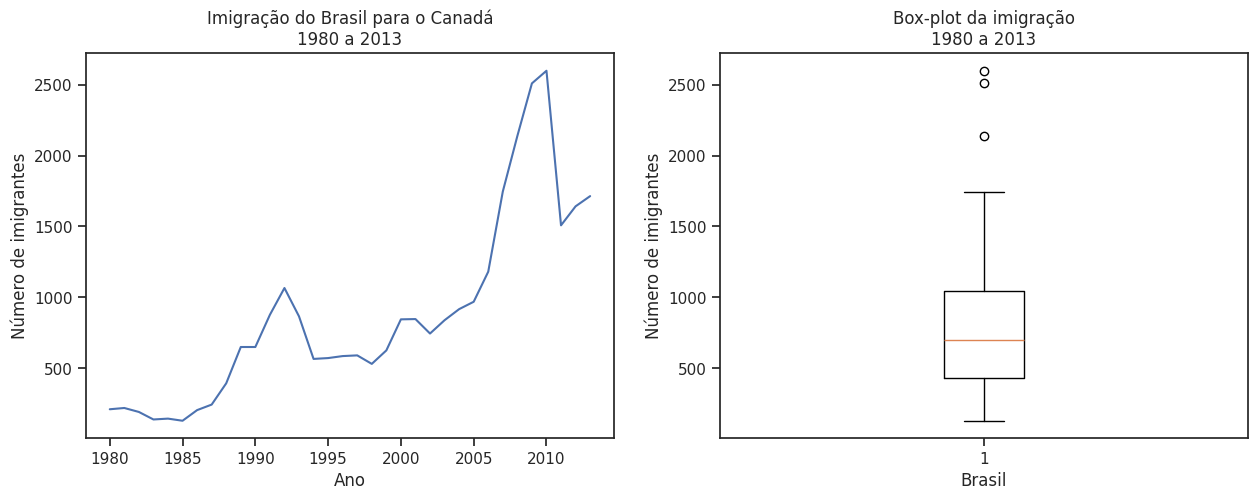

In [95]:
# Gráficos comparativos com subplots (2 gráficos lado a lado)
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Subplot 1: Gráfico de linha para o Brasil
axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes']) # Primeiro subplot (index 0).
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013') # Título primeiro subplot.
axs[0].set_xlabel('Ano') # Define o rótulo do eixo X.
axs[0].set_ylabel('Número de imigrantes') # Define o rótulo do eixo Y.
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5)) # Configura o localizador principal do eixo X

# Subplot 2: Box-plot da imigração do Brasil
axs[1].boxplot(dados_brasil['imigrantes']) # Cria um box-plot no segundo subplot (index 1).
axs[1].set_title('Box-plot da imigração\n1980 a 2013') # Define o título.
axs[1].set_xlabel('Brasil') # Define o rótulo do eixo X.
axs[1].set_ylabel('Número de imigrantes') # Define o rótulo do eixo Y.

plt.show()

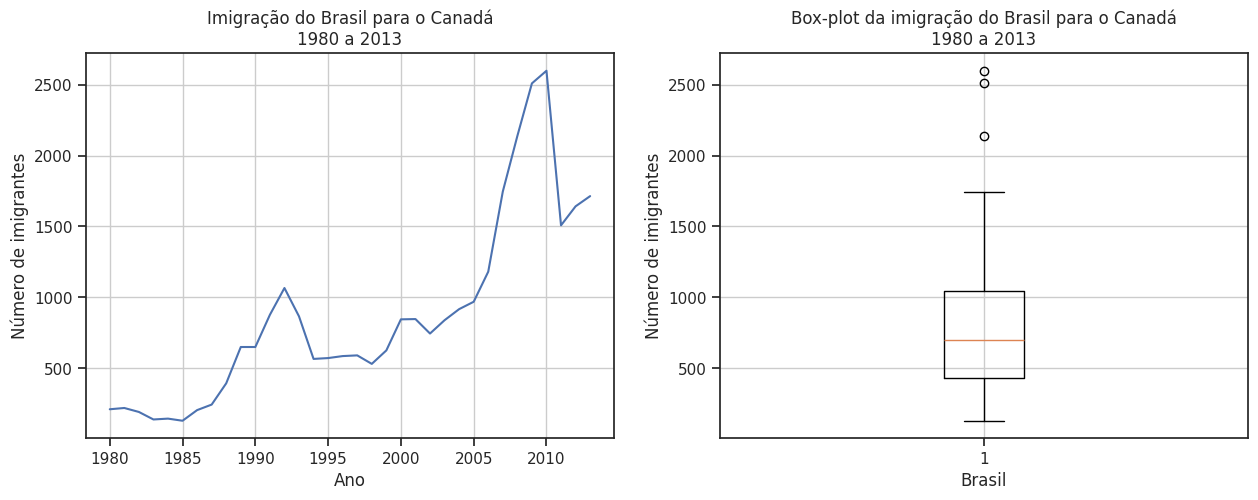

In [96]:
# Cria uma figura com dois subplots em uma linha, com tamanho 15x5
fig, axs = plt.subplots(1, 2, figsize=(15,5))

# Subplot 1: Gráfico de linhas
axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes']) # Plota o gráfico de linha no primeiro subplot.
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013') # Define o título do primeiro subplot.
axs[0].set_xlabel('Ano') # Define o rótulo do eixo X.
axs[0].set_ylabel('Número de imigrantes') # Define o rótulo do eixo Y.
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5)) # Define o espaçamento dos ticks no eixo X.
axs[0].grid() # Exibe grade.

# Subplot 2: Gráfico de boxplot
axs[1].boxplot(dados_brasil['imigrantes']) # Cria um boxplot no segundo subplot.
axs[1].set_title('Box-plot da imigração do Brasil para o Canadá\n1980 a 2013') # Define o título.
axs[1].set_xlabel('Brasil') # Define o rótulo do eixo X.
axs[1].set_ylabel('Número de imigrantes') # Define o rótulo do eixo Y.
axs[1].grid() # Exibe grade.

# Exibe os dois subplots
plt.show()

In [97]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


## Adicionando um título geral

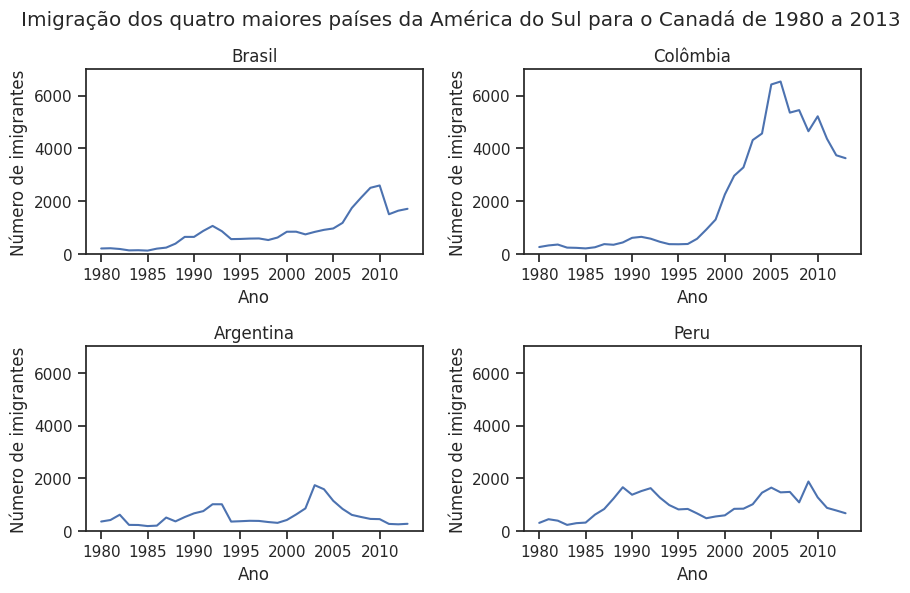

In [98]:
# Criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Ajustando o espaçamento
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Adicionando um título geral para os subplots
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')

# Subplots
axs[0, 0].plot(df.loc['Brasil', anos])
axs[0, 0].set_title('Brasil')

axs[0, 1].plot(df.loc['Colômbia', anos])
axs[0, 1].set_title('Colômbia')

axs[1, 0].plot(df.loc['Argentina', anos])
axs[1, 0].set_title('Argentina')

axs[1, 1].plot(df.loc['Peru', anos])
axs[1, 1].set_title('Peru')

# Alterando a frequência dos ticks do eixo X em todos os subplots
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))

# Adicionando rótulos para os eixos X e Y
for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

# Definindo a mesma escala no eixo Y em todos os subplots
ymin = 0
ymax = 7000
for ax in axs.ravel():
    ax.set_ylim(ymin, ymax)

plt.show()

## Criando subplotes em em duas direções

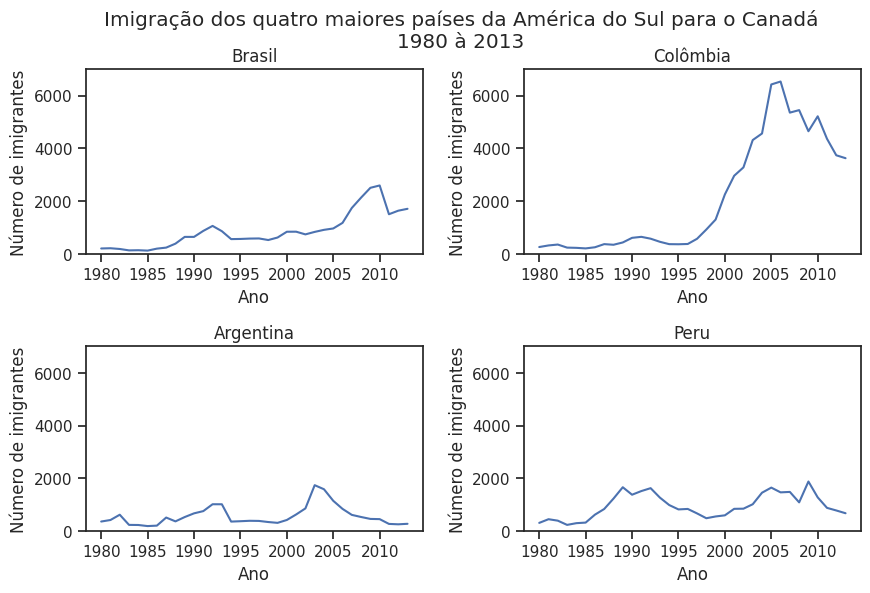

In [99]:
# Criando subplots em duas direções (2 linhas x 2 colunas)
fig,axs = plt.subplots(2, 2, figsize=(10, 6)) # Cria uma figura com uma grade de subplots de 2 linhas por 2 colunas, com tamanho definido.

# Ajustando o espaçamento entre os gráficos para evitar sobreposição de informações
fig.subplots_adjust(hspace=0.5, wspace=0.3) # Ajusta o espaçamento horizontal e vertical entre os subplots para melhorar a legibilidade.

# Adicionando um título geral à figura
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá\n1980 à 2013') # Define um título principal para toda a figura.

# Subplot 1: Gráfico do Brasil
axs[0,0].plot(df.loc['Brasil', anos]) # Plota a série de imigração do Brasil no primeiro subplot (linha 0, coluna 0).
axs[0, 0].set_title('Brasil') # Define o título específico para o subplot do Brasil.

# Subplot 2: Gráfico da Colômbia
axs[0,1].plot(df.loc['Colômbia', anos]) # Plota a série de imigração da Colômbia no segundo subplot (linha 0, coluna 1).
axs[0,1].set_title('Colômbia') # Define o título específico para o subplot da Colômbia.

# Subplot 3: Gráfico da Argentina
axs[1,0].plot(df.loc['Argentina', anos]) # Plota a série de imigração da Argentina no terceiro subplot (linha 1, coluna 0).
axs[1,0].set_title('Argentina') # Define o título específico para o subplot da Argentina.

# Subplot 4: Gráfico do Peru
axs[1,1].plot(df.loc['Peru', anos]) # Plota a série de imigração do Peru no quarto subplot (linha 1, coluna 1).
axs[1,1].set_title('Peru') # Define o título específico para o subplot do Peru.

# Aplicando uma marcação de 5 em 5 anos no eixo X de todos os gráficos
for ax in axs.flat: # Itera sobre todos os objetos de eixo ('ax') na figura, independentemente de sua posição na grade.
   ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Configura o localizador principal do eixo X para exibir rótulos a cada 5 anos em cada subplot.

# Adicionando rótulos aos eixos X e Y de todos os subplots
for ax in axs.flat: # Itera novamente sobre todos os objetos de eixo.
   ax.set_xlabel('Ano') # Define o rótulo do eixo X para cada subplot.
   ax.set_ylabel('Número de imigrantes') # Define o rótulo do eixo Y para cada subplot.

# Padronizando os limites do eixo Y para facilitar a comparação entre os gráficos
ymin = 0 # Define o valor mínimo para o eixo Y.
ymax = 7000 # Define o valor máximo para o eixo Y.
for ax in axs.ravel(): # Itera sobre todos os objetos de eixo, mas 'ravel()' retorna uma visualização unidimensional da matriz de eixos.
   ax.set_ylim(ymin, ymax) # Define os limites mínimo e máximo para o eixo Y de cada subplot, padronizando a escala vertical.

# Exibindo os subplots
plt.show() # Exibe a figura completa com todos os subplots e suas personalizações.

## Personalização de Gráficos de Linha com Matplotlib

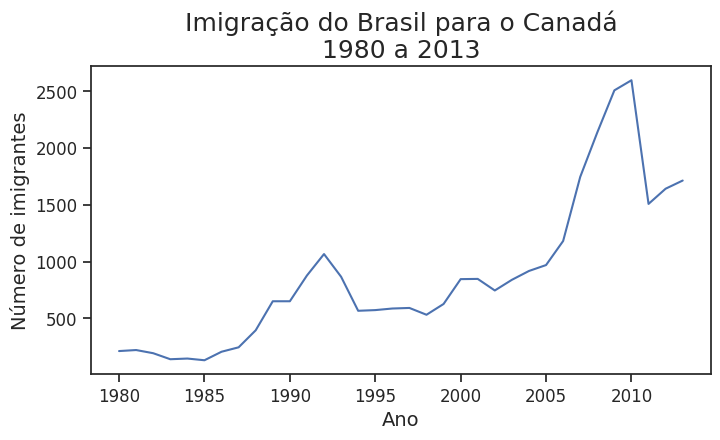

In [100]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18) # Título do gráfico.
ax.set_ylabel('Número de imigrantes', fontsize=14) # Define o eixo Y com tamanho de fonte específico.
ax.set_xlabel('Ano', fontsize=14) # Define eixo X com um tamanho de fonte específico.
ax.yaxis.set_tick_params(labelsize=12) # Tamanho da fonte dos rótulos (ticks) do eixo Y.
ax.xaxis.set_tick_params(labelsize=12) # Tamanho da fonte dos rótulos (ticks) do eixo X.
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Frequência dos rótulos do eixo X a cada 5 anos.
plt.show()

## Mudando a posição do título do gráfico

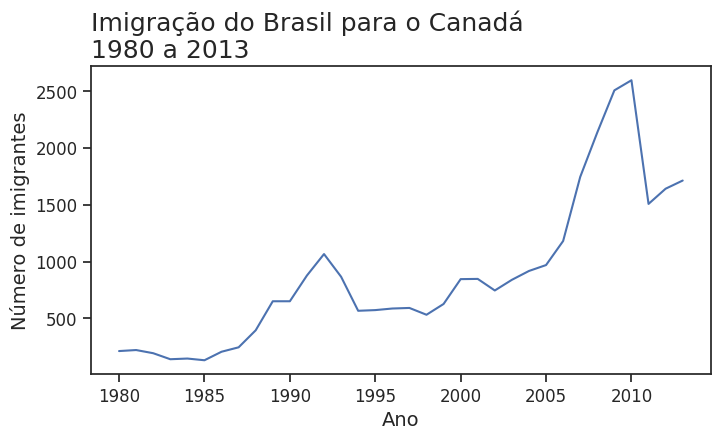

In [101]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left') # Alinha à esquerda ('loc='left'').
ax.set_ylabel('Número de imigrantes', fontsize=14) # Rótulo do eixo Y.
ax.set_xlabel('Ano', fontsize=14) # Rótulo do eixo X.
ax.yaxis.set_tick_params(labelsize=12) # Tamanho dos ticks do eixo Y.
ax.xaxis.set_tick_params(labelsize=12) # Tamanho dos ticks do eixo X.
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Marcação do eixo X a cada 5 anos.

plt.show()

## Mudando a espessura da linha

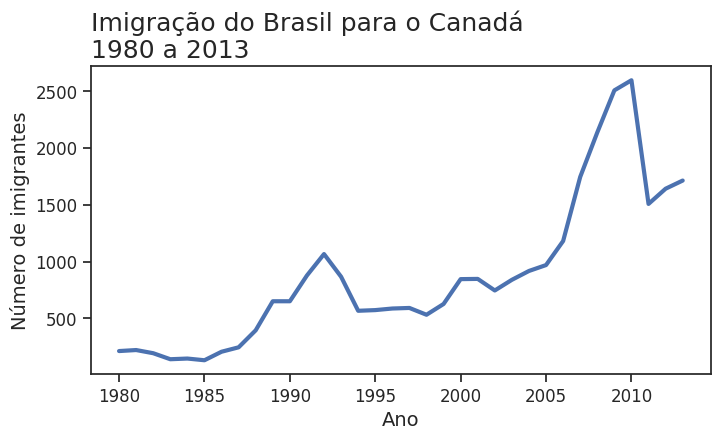

In [102]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3) # Especifica a largura da linha (lw=3).
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left') # Título alinhamento à esquerda.
ax.set_ylabel('Número de imigrantes', fontsize=14) # Rótulo do eixo Y.
ax.set_xlabel('Ano', fontsize=14) # Rótulo do eixo X.
ax.yaxis.set_tick_params(labelsize=12) # Tamanho da fonte dos ticks do eixo Y.
ax.xaxis.set_tick_params(labelsize=12) # Tamanho da fonte dos ticks do eixo X.
ax.xaxis.set_major_locator(plt.MultipleLocator(5)) # Intervalos fixos no eixo X a cada 5 anos.

plt.show()

## Adicionando marcadores aos pontos da linha

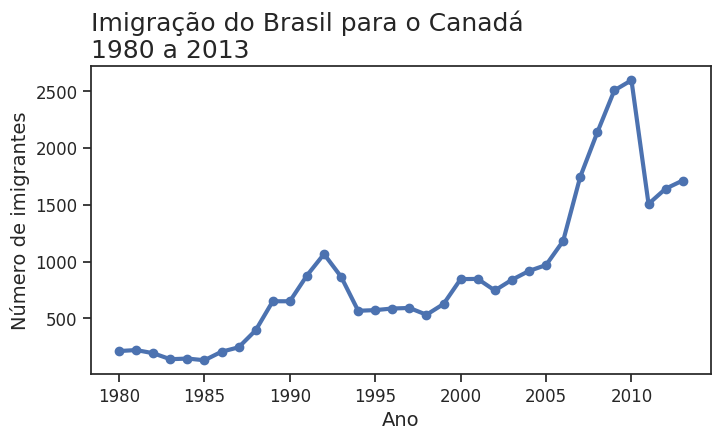

In [103]:
fig, ax = plt.subplots(figsize=(8, 4))
# Adiciona a linha com espessura e um marcador circular ('o') em cada ponto de dados.
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker='o')
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.show()

## Adicionando grade ao gráfico

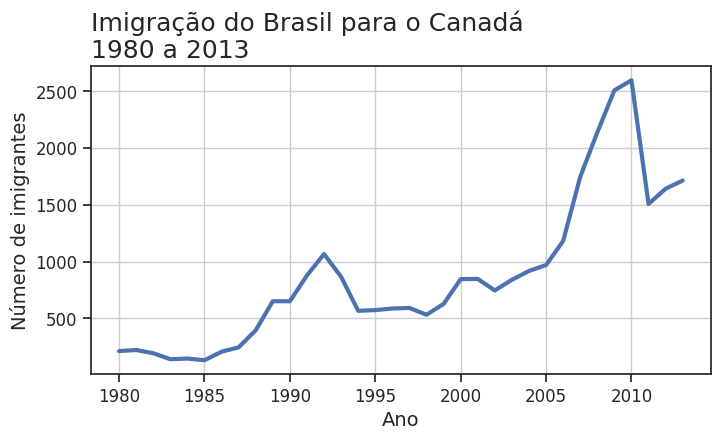

In [104]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid() # Exibe grade

plt.show()

## Personalizando o estilo da grade

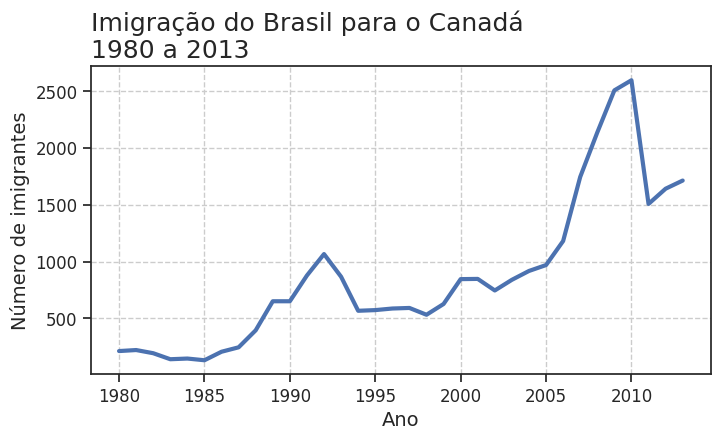

In [105]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--') # Grade estilo de linha como tracejado ('--').

plt.show()

## Alterando apenas a cor da linha

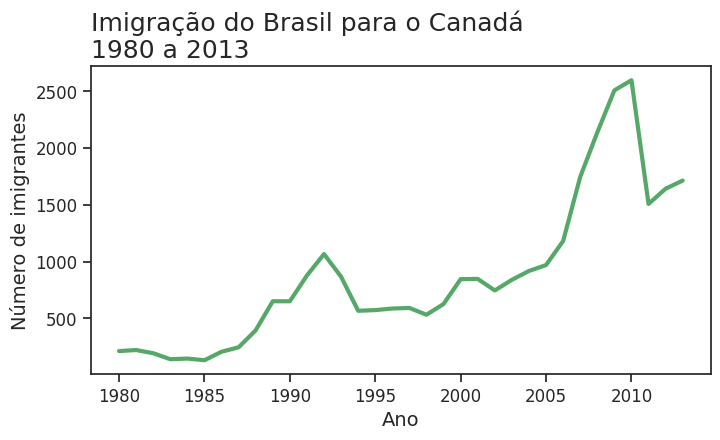

In [106]:
fig, ax = plt.subplots(figsize=(8, 4))
# Linha com espessura 3 e cor verde ('g').
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, color='g')
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('Ano', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.show()

## Gráficos de Barra com Matplotlib

In [107]:
# Filtrando os dados para América do Sul

# Cria um novo DataFrame com apenas os países classificados como "América do Sul"
america_sul = df.query('Região == "América do Sul"')

america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


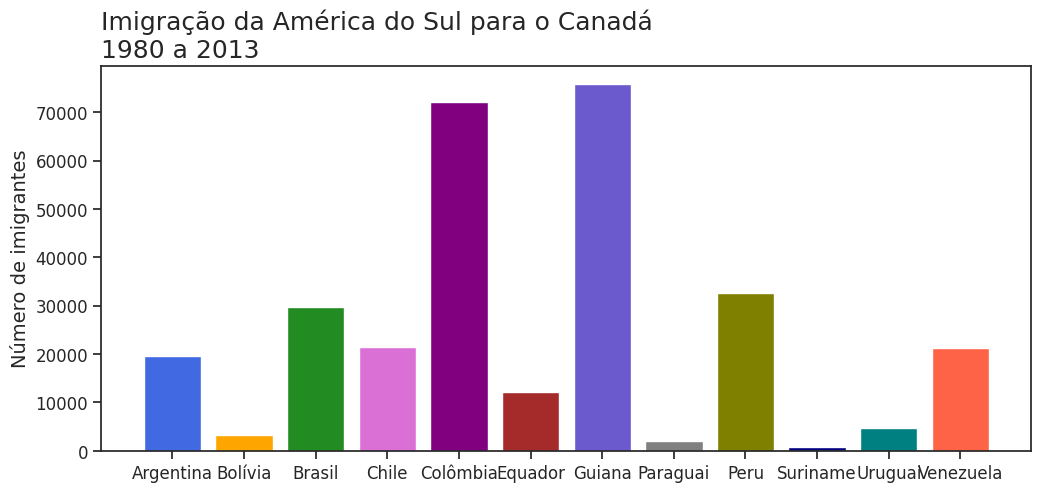

In [108]:
# Lista de cores personalizada para diferenciar os países no gráfico
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando a figura e os eixos com tamanho personalizado
fig, ax = plt.subplots(figsize=(12, 5)) # Eixos com dimensões de 12x5 polegadas.
# Criando gráfico de barras verticais com as cores definidas
ax.bar(america_sul.index, america_sul['Total'], color=cores)
# Definindo título e rótulos
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.set_xlabel('') # Rótulo do eixo Y como vazio.
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

## Alterando o gráfico para barras horizontais para melhor visualização

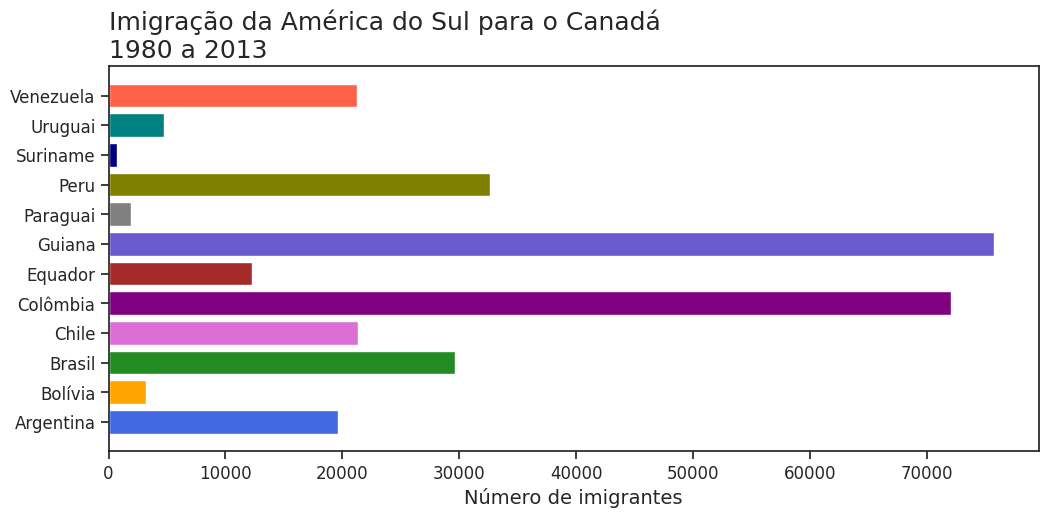

In [109]:
# Lista de cores
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul.index, america_sul['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('') # Rótulo do eixo Y como vazio.
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

In [110]:
# Ordenando os dados por total de imigrantes de forma crescente
america_sul_sorted = america_sul.sort_values(by='Total', ascending=True)
america_sul_sorted

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Suriname,América Latina e o Caribe,América do Sul,15,10,21,12,5,16,7,46,...,15,16,20,9,12,13,11,16,4,739
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Uruguai,América Latina e o Caribe,América do Sul,128,132,146,105,90,92,137,269,...,217,175,147,160,99,93,81,47,58,4715
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Venezuela,América Latina e o Caribe,América do Sul,103,117,174,124,142,165,179,229,...,1211,1192,1335,1239,1353,998,1452,1373,1022,21267
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659


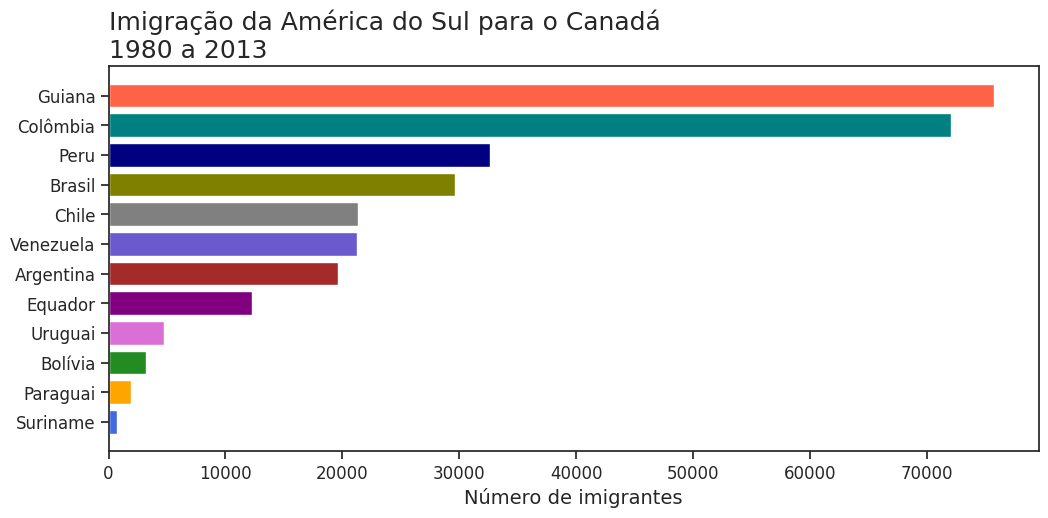

In [111]:
# Criando gráfico horizontal com os dados ordenados
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('Imigração da América do Sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('') # Rótulo do eixo Y como vazio.
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

## Destacando o Brasil com uma cor diferente no gráfico

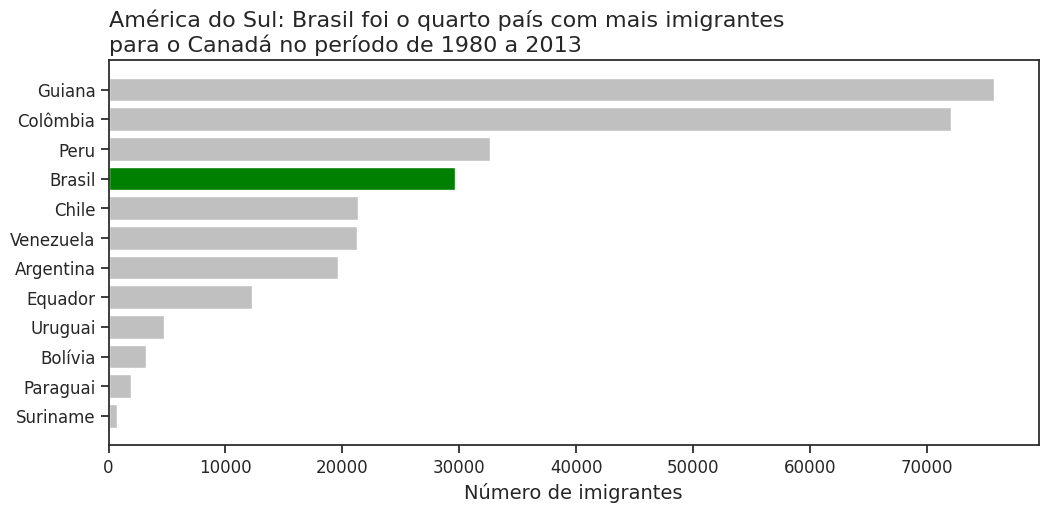

In [112]:
# Criando uma lista de cores para destacar o Brasil
cores = [] # Inicializa uma lista vazia para as cores.
for pais in america_sul_sorted.index: # Itera sobre o índice (países).
    if pais == 'Brasil': # Se o país atual for 'Brasil'.
        cores.append('green') # Adiciona a cor verde para o Brasil.
    else: # Para qualquer outro país.
        cores.append('silver') # Adiciona a cor cinza para os demais países.

# Gráfico com destaque para o Brasil
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

plt.show()

## Adicionando anotações com os valores numéricos em cada barra

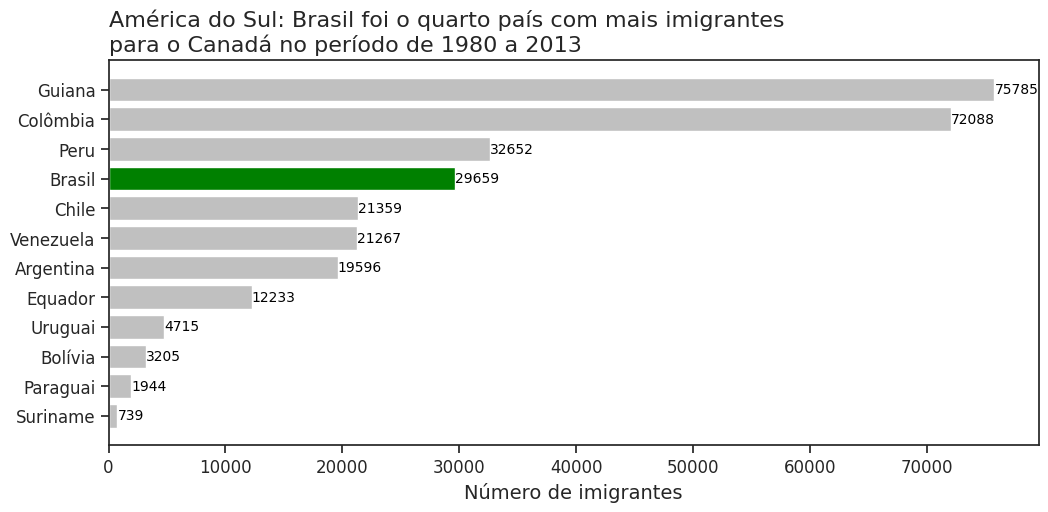

In [113]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index: # Itera sobre os países.
    if pais == 'Brasil': # Se o país for Brasil.
        cores.append('green') # Cor verde.
    else: # Caso contrário.
        cores.append('silver') # Cor cinza.

# Adicionando anotações com os valores numéricos em cada barra
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('') # Rótulo do eixo Y como vazio.
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para inserir os valores no final de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

plt.show()

## Retirando o frame (caixa em volta do gráfico)

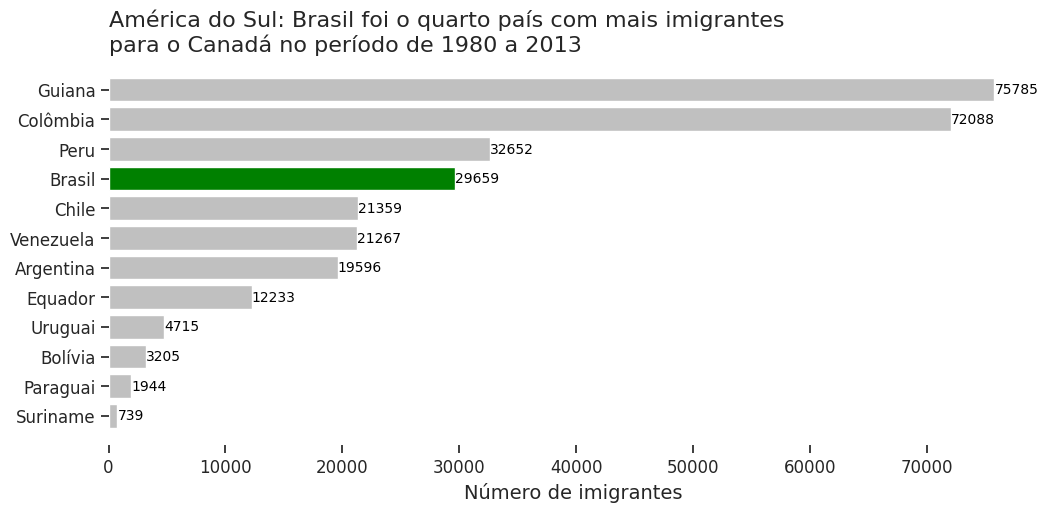

In [114]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Inserindo os valores nas barras
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Removendo o frame
ax.set_frame_on(False) # Desativa a exibição do contorno

plt.show()

## Retirando o eixo X para visual mais limpo

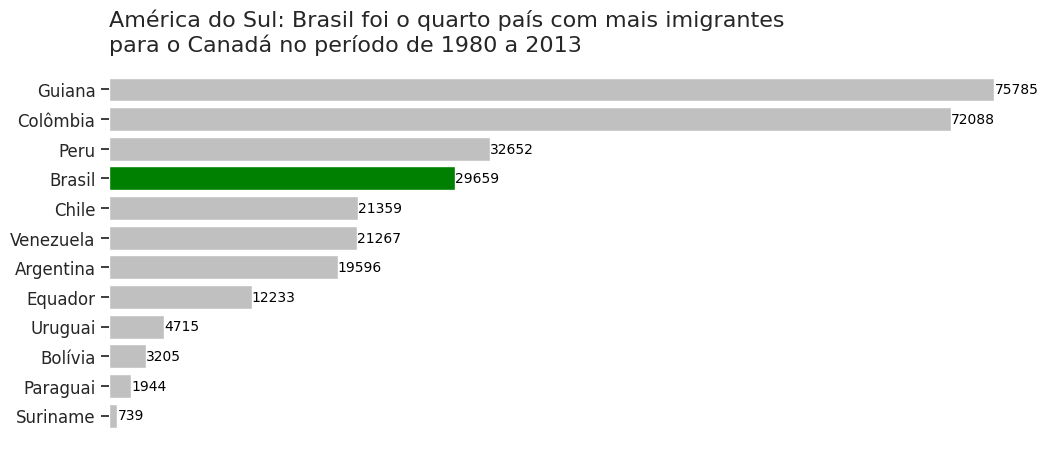

In [115]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Inserindo os valores nas barras
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Removendo o frame e o eixo X
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)

plt.show()

## Retirando os ticks ao lado do nome dos países (os marcadores ao lado dos rótulos no eixo Y)

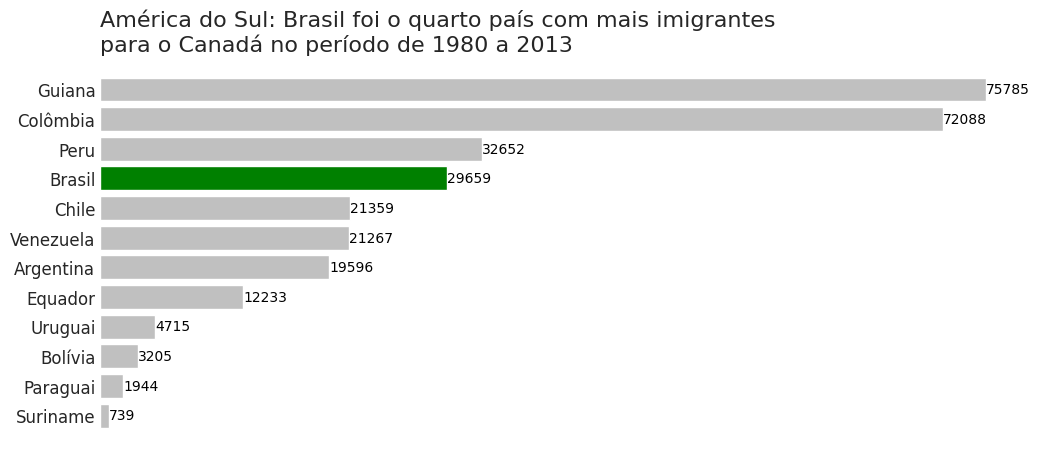

In [116]:
# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura e os eixos para o gráfico horizontal de barras
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
# Título do gráfico com localização à esquerda
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
# Rótulo do eixo X (eixo horizontal)
ax.set_xlabel('Número de imigrantes', fontsize=14)
# Retirando o rótulo do eixo Y (eixo vertical)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar os valores absolutos ao lado de cada barra
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Removendo o contorno (frame) da área do gráfico
ax.set_frame_on(False)

# Ocultando o eixo X
ax.get_xaxis().set_visible(False)

# Removendo os ticks de ambos os eixos (horizontal e vertical)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

## Salvando Gráficos com Matplotlib

In [117]:
# Tipos de arquivos que podem ser utilizados para salvar a figura
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


## Criando gráfico de linha com a tendência de imigração do Brasil para o Canadá

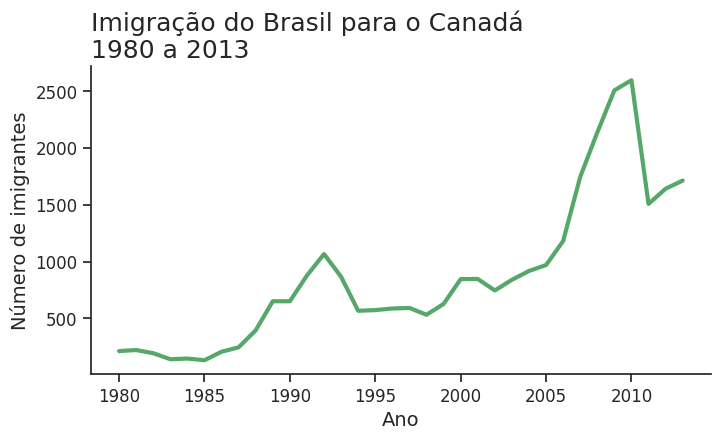

In [118]:
# Inicializando a figura e os eixos
fig, ax = plt.subplots(figsize=(8, 4))
# Criando a linha do gráfico com cor verde e largura de linha igual a 3
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, color='g')
# Adicionando título, eixos e ajustes visuais
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
# Ajustando os ticks dos eixos
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
# Removendo as bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Salvando o gráfico como imagem PNG
fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

## Repetindo o gráfico horizontal de barras para a América do Sul, agora com salvamento


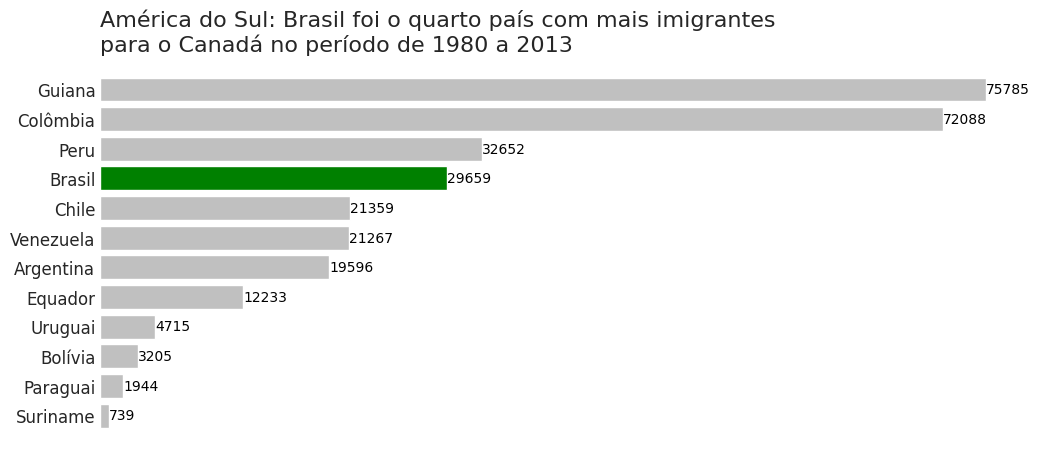

In [119]:
# Criando novamente uma lista de cores para o destaque do Brasil
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura e o gráfico
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Adicionando os valores nas barras
for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Ajustes visuais: removendo frame e eixo X
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

# Salvando a figura como imagem
fig.savefig('imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

## Criando gráfico com Seaborn

In [120]:
# Definindo o tema estético padrão do Seaborn
sns.set_theme()

# Selecionando os 10 países com maior número de imigrantes (total acumulado)
top_10 = df.sort_values('Total', ascending=False).head(10)

top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


<Axes: xlabel='País', ylabel='Total'>

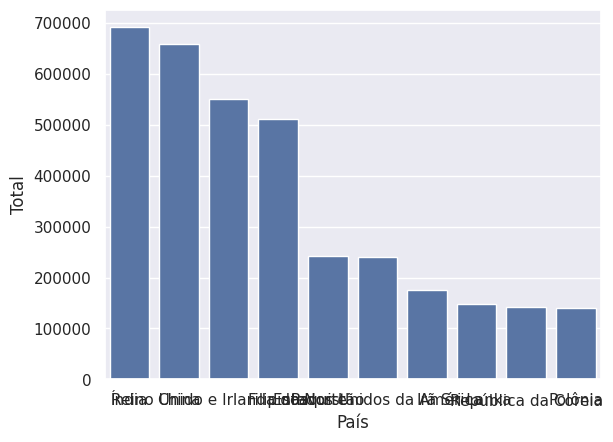

In [121]:
# Criando gráfico de barras verticais com Seaborn
sns.barplot(data=top_10, x=top_10.index, y='Total')

## Deixando o gráfico de barras na horizontal

<Axes: xlabel='Total', ylabel='País'>

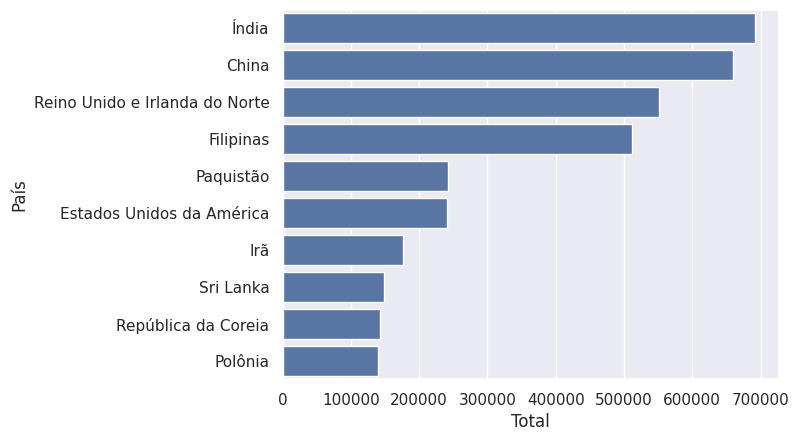

In [122]:
# Criando gráfico de barras horizontais com Seaborn (melhor para nomes longos)
sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

## Personalizando visualizações com Seaborn

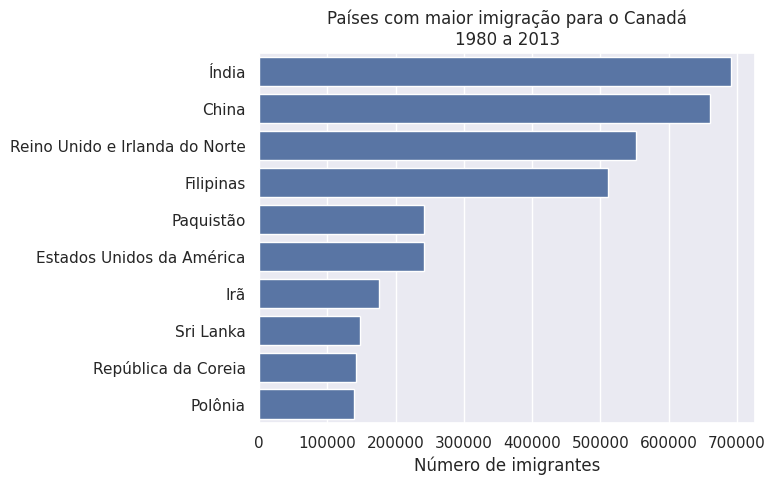

In [123]:
# Criando gráfico horizontal com personalização dos rótulos e título
ax=sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

# Adicionando título e rótulos dos eixos
ax.set(title='Países com maior imigração para o Canadá\n1980 a 2013',
       xlabel='Número de imigrantes',
       ylabel='')

plt.show()

## Criando uma figura e alterando tamanho das fontes

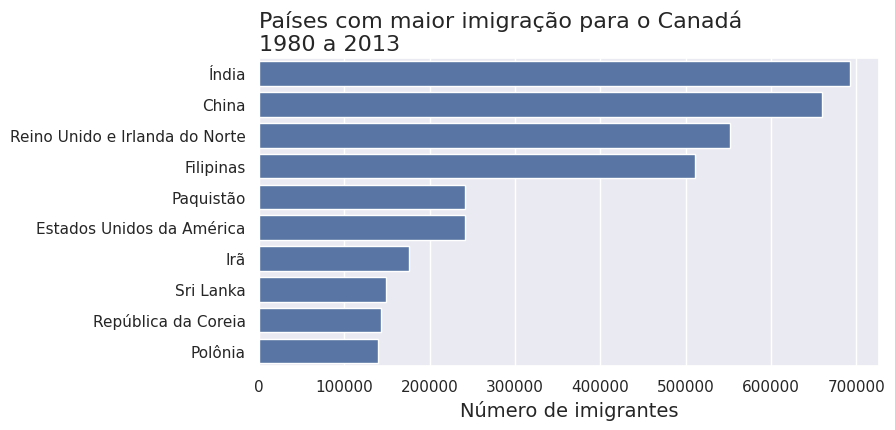

In [124]:
# Criando a figura
fig, ax = plt.subplots(figsize=(8,4))
# Criando o gráfico de barras horizontais com Seaborn
ax=sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

# Adicionando título e rótulos dos eixos
ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')

plt.show()

## Função para gerar gráficos com diferentes paletas de cores

    
    

In [125]:
def gerar_grafico_paleta(palette_name):
    cores = sns.color_palette(palette_name, len(top_10))
    # Criação da figura
    fig, ax = plt.subplots(figsize=(8, 4))
    # Gráfico com coloração personalizada para evitar o FutureWarning
    sns.barplot(data=top_10, y='País', x='Total', hue='País', dodge=False,
                orient='h', palette=palette_name, legend=False)
    # Adiciona título e rótulos
    ax.set_title("Países com maior imigração para o Canadá\n1980 a 2013", loc='left', fontsize=16)
    ax.set_xlabel('Número de Imigrantes', fontsize=14)
    ax.set_ylabel('')

    plt.show()

## Aplicando diferentes paletas de cores

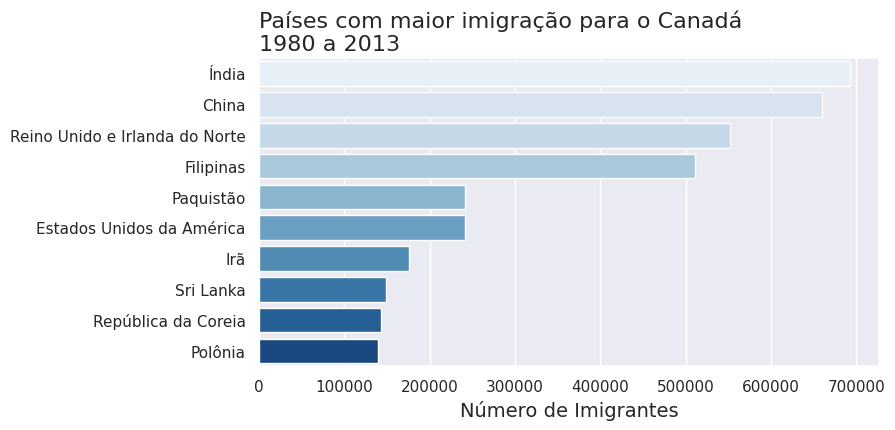

In [126]:
# Paleta sequencial azul
gerar_grafico_paleta('Blues')

## Invertendo o gradiente

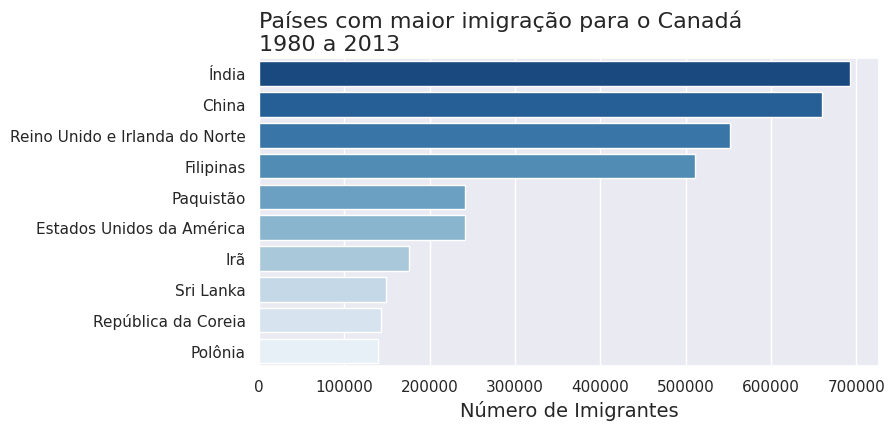

In [127]:
# Paleta azul invertida
gerar_grafico_paleta('Blues_r')

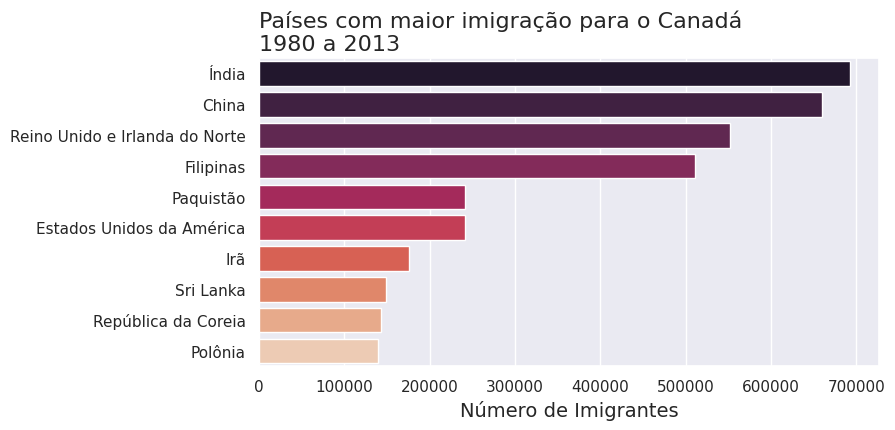

In [128]:
# Paleta temática "rocket"
gerar_grafico_paleta('rocket')

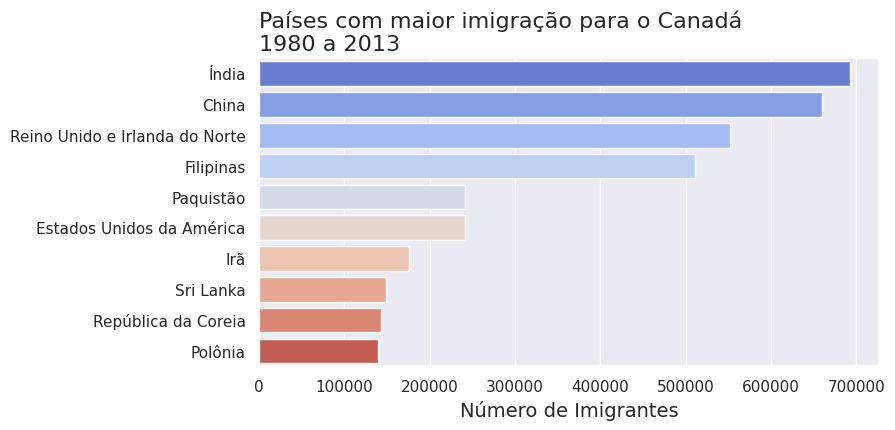

In [129]:
# Paleta divergente "coolwarm"
gerar_grafico_paleta('coolwarm')

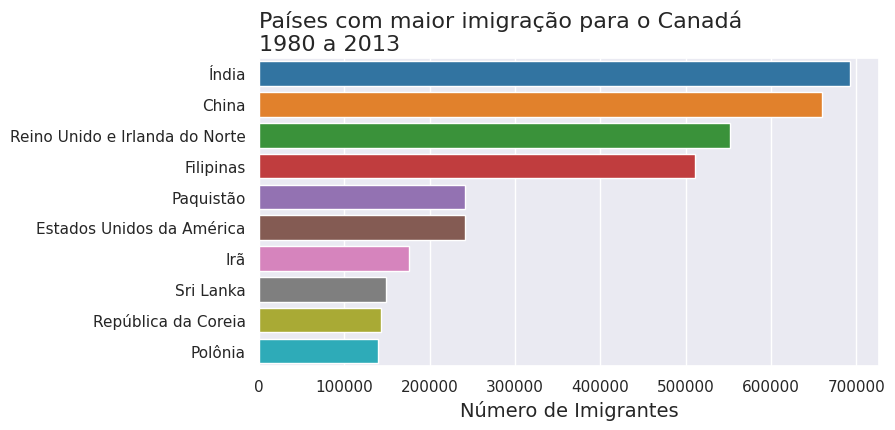

In [130]:
# Paleta categórica "tab10"
gerar_grafico_paleta('tab10')

## Explorando temas do Seaborn

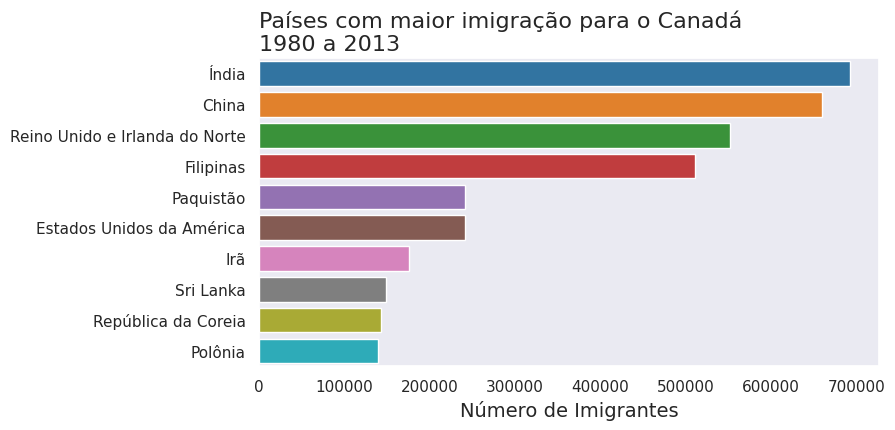

In [131]:
# Alterando o tema para escuro
sns.set_theme(style='dark')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

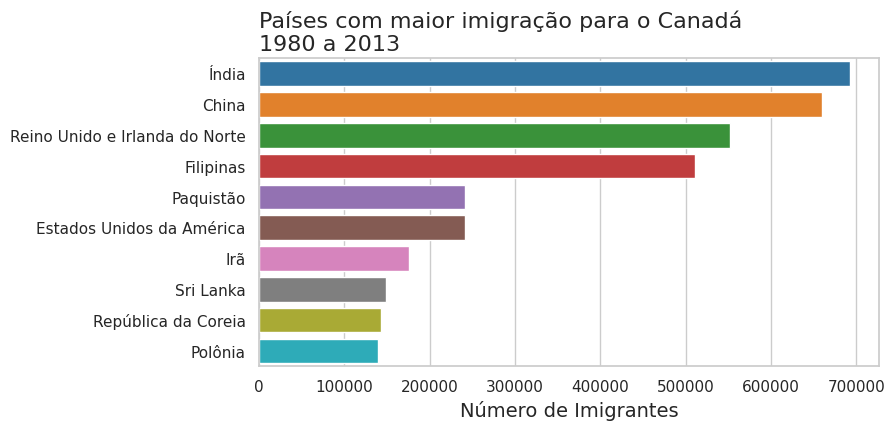

In [132]:
# Alterando o tema
sns.set_theme(style='whitegrid')
gerar_grafico_paleta('tab10')

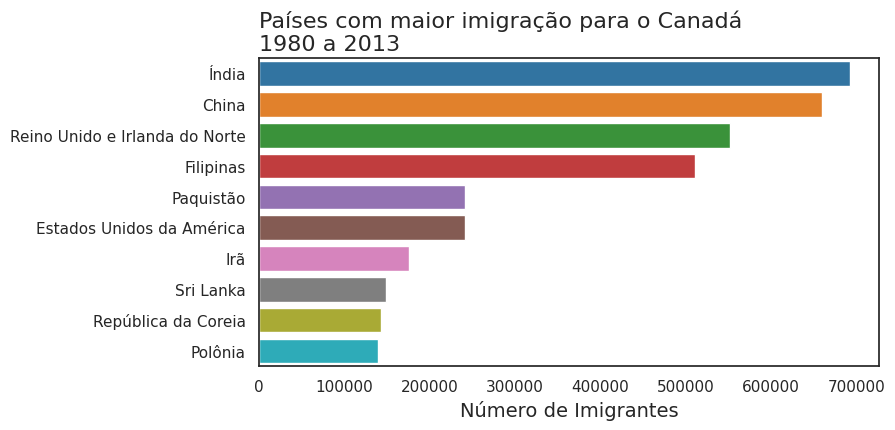

In [133]:
# Alterando o tema
sns.set_theme(style='white')

# Gerando o gráfico
gerar_grafico_paleta('tab10')

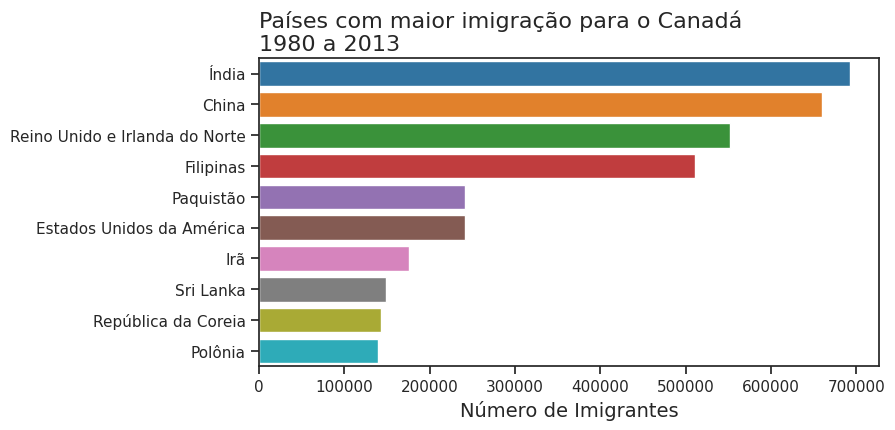

In [134]:
sns.set_theme(style='ticks')

gerar_grafico_paleta('tab10')

## Exemplo final com **despine()**

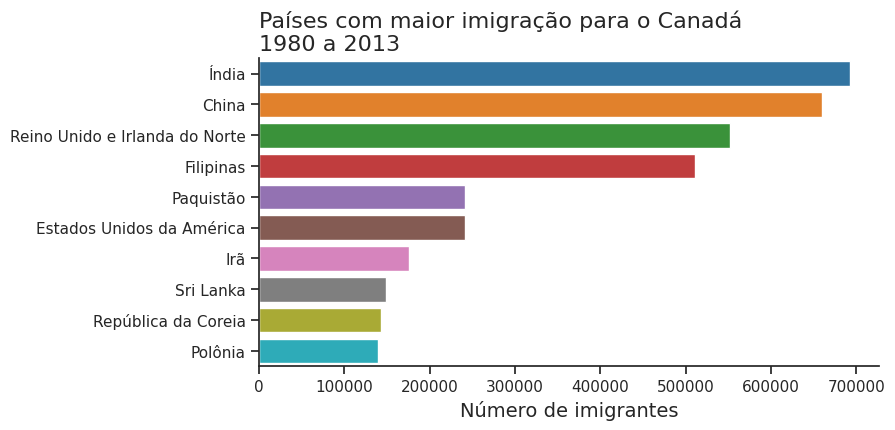

In [135]:
# Criando a figura
fig, ax = plt.subplots(figsize=(8,4))
# Gráfico com paleta tab10
sns.barplot(data=top_10, y='País', x='Total', hue='País', dodge=False,
            orient='h', palette='tab10', legend=False)
# Personalizando os rótulos e título
ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
# Remove as bordas superiores e laterais do gráfico.
sns.despine() # Remove bordas da parte superior e direita do gráfico.

plt.show()

## Gráficos com Plotly Express

In [136]:
# Gráfico de linha simples interativo
fig = px.line(dados_brasil, x='ano', y='imigrantes')

fig.show()

## Ajustando o tamanho da visualização

In [137]:
# Definindo largura e altura da figura
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.update_layout(width=1000, height=500)

fig.show()

## Rotacionando os rótulos do eixo x

In [138]:
# Rotaciona os valores do eixo x para melhor visualização
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.update_layout(width=1000, height=500, # Define largura e altura.
                  xaxis={'tickangle': -45}) # rotaciona os rótulos em -45 graus
fig.show()

## Adicionando títulos e rótulos com Plotly

In [139]:
# Título principal do gráfico
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(width=1000, height=500,
                  xaxis={'tickangle': -45})

fig.show()

## Adicionando rótulos para os eixos x e y

In [140]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013') # Cria o gráfico com título.
fig.update_layout(
    width=1000, height=500, # Largura e altura da figura.
    xaxis={'tickangle': -45}, # Rotação dos rótulos do eixo X.
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

## Personalizando visualizações com Plotly

In [141]:
# Alterando tipo, tamanho e cor da fonte, além das cores do título
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013') # Cria o gráfico.
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial', # Define a fonte para todo o texto do gráfico.
    font_size=14, # Define o tamanho padrão da fonte.
    font_color='grey', # Define a cor padrão para o texto.
    title_font_color='black', # Define a cor específica para o título.
    title_font_size=22, # Define o tamanho específico para a fonte do título.
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

## Alterando a cor da linha

In [142]:
# Modificando a cor e espessura da linha do gráfico
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_traces(line_color='green', line_width=4)
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14, # Tamanho da fonte.
    font_color='grey', # Cor da fonte.
    title_font_color='black', # Cor do título.
    title_font_size=22, # Tamanho do título.
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

## Alterando cores com mais de uma variável (múltiplos países)

In [143]:
# Exibe as primeiras linhas do DataFrame 'america_sul'.
america_sul.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [144]:
# Limpando colunas desnecessárias
df_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis=1)

# Transpondo o DataFrame para que os anos fiquem no eixo x
america_sul_final = df_america_sul_clean.T

# Verificando a estrutura
america_sul_final.head()

País,Argentina,Bolívia,Brasil,Chile,Colômbia,Equador,Guiana,Paraguai,Peru,Suriname,Uruguai,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


In [145]:
# Criando gráfico com linhas coloridas por país
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País',
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

## Adicionando marcadores nos pontos das linhas

In [146]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País', markers=True,
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013') # Cria o gráfico de linha, adicionando marcadores em cada ponto de dados com 'markers=True'.
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

## Salvando Gráficos com Plotly em HTML

In [147]:
# Exportando o gráfico interativo para um arquivo HTML
fig.write_html('imigracao_america_sul.html')